### Challenge Link:
### https://datahack.analyticsvidhya.com/contest/machine-learning-starter-program-hackathon/#ProblemStatement

### Problem Statement:
### You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to predict the performance on such tests given the demographic information and training program/test details. This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and performance for a trainee. The evaluation metric for this competition is AUC ROC score.

In [1]:
# load basic libraries
import pandas as pd
import numpy as np

c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
# load the training/testing/submission files
train = pd.read_csv('train_HK6lq50.csv')
test = pd.read_csv('test_wF0Ps6O.csv')
sub = pd.read_csv('sample_submission_vaSxamm.csv')

In [4]:
print("training data shape:", train.shape)
print("testing data shape:", test.shape)

training data shape: (73147, 16)
testing data shape: (31349, 15)


In [5]:
# check the data types of the training dataset
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [6]:
# check the head of the data
train.head()

id program_id program_type  program_duration  test_id test_type  \
0   9389_150        Y_1            Y               136      150   offline   
1   16523_44        T_1            T               131       44   offline   
2  13987_178        Z_2            Z               120      178    online   
3   13158_32        T_2            T               117       32   offline   
4   10591_84        V_3            V               131       84   offline   

  difficulty_level  trainee_id gender            education  city_tier   age  \
0     intermediate        9389      M        Matriculation          3  24.0   
1             easy       16523      F  High School Diploma          4  26.0   
2             easy       13987      M        Matriculation          1  40.0   
3             easy       13158      F        Matriculation          3   NaN   
4     intermediate       10591      F  High School Diploma          1  42.0   

   total_programs_enrolled is_handicapped  trainee_engagement_rating  is_pass  
0                        5              N                        1.0        0  
1                        2              N                        3.0        1  
2                        1              N                        2.0        1  
3                        4              N                        1.0        1  
4                        2              N                        4.0        1

In [7]:
# check statistical summary
train.describe()

program_duration       test_id    trainee_id     city_tier  \
count      73147.000000  73147.000000  73147.000000  73147.000000   
mean         128.208676     91.079306   9843.079620      2.246845   
std            6.889679     51.239048   5703.556093      1.011587   
min          117.000000      0.000000      1.000000      1.000000   
25%          121.000000     45.000000   5040.000000      1.000000   
50%          131.000000     90.000000   9641.000000      2.000000   
75%          134.000000    135.000000  14552.000000      3.000000   
max          136.000000    187.000000  20098.000000      4.000000   

                age  total_programs_enrolled  trainee_engagement_rating  \
count  45418.000000             73147.000000               73070.000000   
mean      36.494033                 2.583934                   2.395634   
std        9.041119                 1.240816                   1.325288   
min       17.000000                 1.000000                   1.000000   
25%       28.000000                 2.000000                   1.000000   
50%       39.000000                 2.000000                   2.000000   
75%       45.000000                 3.000000                   4.000000   
max       63.000000                14.000000                   5.000000   

            is_pass  
count  73147.000000  
mean       0.695408  
std        0.460238  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [8]:
# check any missing data
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [9]:
test.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

In [10]:
# check unique values of rating
train.trainee_engagement_rating.unique()

array([ 1.,  3.,  2.,  4.,  5., nan])

In [11]:
# check unique values of age
train.age.unique()

array([24., 26., 40., nan, 42., 29., 48., 45., 28., 43., 27., 32., 44.,
       41., 23., 38., 30., 46., 25., 31., 34., 56., 47., 33., 22., 59.,
       49., 21., 18., 35., 36., 50., 55., 39., 51., 20., 19., 54., 58.,
       57., 37., 52., 53., 17., 63., 60.])

In [12]:
# filling missing values in both datasets
age_median = train.loc[:,"age"].median()
train['age'] = train['age'].fillna(age_median)
rating_median = train.loc[:,"trainee_engagement_rating"].median()
train['trainee_engagement_rating'] = train['trainee_engagement_rating'].fillna(rating_median)

age1_median = test.loc[:,"age"].median()
test['age'] = test['age'].fillna(age1_median)
rating1_median = test.loc[:,"trainee_engagement_rating"].median()
test['trainee_engagement_rating'] = test['trainee_engagement_rating'].fillna(rating1_median)

In [14]:
# recheck if there any missing value
train.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [15]:
test.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

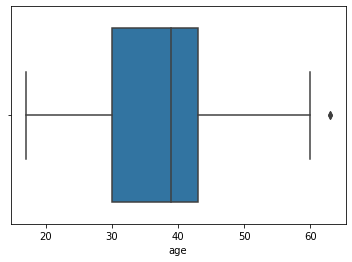

In [16]:
# check outliars in age column
import seaborn as sns
sns.boxplot(x=train['age'])

In [17]:
# replace outliar from age column
train['age'] = train['age'].replace(train['age'].max(),train['age'].median())
test['age'] = test['age'].replace(test['age'].max(),test['age'].median())

In [18]:
# feature extraction- creating new columns from days
import datetime
from dateutil.relativedelta import relativedelta
y=[]
m=[]
d=[]
for i,row in train.iterrows():
    now = datetime.datetime.now()
    td = datetime.timedelta(days=row['program_duration'])
    five_hundred_days_ago = now - td
    rl = relativedelta(now, five_hundred_days_ago)
    y.append(rl.years)
    m.append(rl.months)
    d.append(rl.days)
train['year']=y
train['month']=m
train['day']=d
#print(train.head())

y1=[]
m1=[]
d1=[]
for i,row in test.iterrows():
    now = datetime.datetime.now()
    td = datetime.timedelta(days=row['program_duration'])
    five_hundred_days_ago = now - td
    rl = relativedelta(now, five_hundred_days_ago)
    y1.append(rl.years)
    m1.append(rl.months)
    d1.append(rl.days)
test['year']=y1
test['month']=m1
test['day']=d1

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 19 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          73147 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
year                         73147 non-null int64
month                        

In [22]:
# seperate the features and target column
X = train.drop('is_pass', axis=1)
y = train.is_pass

In [23]:
X.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'year', 'month', 'day'],
      dtype='object')

In [24]:
# specify the categorical columns list
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [25]:
# split the training dataset into train and validation datasets
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=42)

X_test = test

In [26]:
# import catboost library
from catboost import CatBoostClassifier, Pool, cv

In [27]:
# initialize the catboost with required parameters
model = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=42,
    use_best_model=True,
    verbose=1  
)

In [28]:
# train the model
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  uncomment this for text output
    plot=True
);

Learning rate set to 0.120387


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7015904	best: 0.7015904 (0)	total: 199ms	remaining: 3m 18s
1:	test: 0.7104489	best: 0.7104489 (1)	total: 282ms	remaining: 2m 20s
2:	test: 0.7677628	best: 0.7677628 (2)	total: 379ms	remaining: 2m 5s
3:	test: 0.7926415	best: 0.7926415 (3)	total: 441ms	remaining: 1m 49s
4:	test: 0.7988635	best: 0.7988635 (4)	total: 554ms	remaining: 1m 50s
5:	test: 0.8021891	best: 0.8021891 (5)	total: 664ms	remaining: 1m 49s
6:	test: 0.8048788	best: 0.8048788 (6)	total: 722ms	remaining: 1m 42s
7:	test: 0.8062575	best: 0.8062575 (7)	total: 761ms	remaining: 1m 34s
8:	test: 0.8064788	best: 0.8064788 (8)	total: 854ms	remaining: 1m 34s
9:	test: 0.8084958	best: 0.8084958 (9)	total: 954ms	remaining: 1m 34s
10:	test: 0.8095965	best: 0.8095965 (10)	total: 1.05s	remaining: 1m 34s
11:	test: 0.8103155	best: 0.8103155 (11)	total: 1.15s	remaining: 1m 34s
12:	test: 0.8111851	best: 0.8111851 (12)	total: 1.23s	remaining: 1m 33s
13:	test: 0.8126639	best: 0.8126639 (13)	total: 1.33s	remaining: 1m 34s
14:	test: 0.8

117:	test: 0.8300282	best: 0.8300282 (117)	total: 11.8s	remaining: 1m 28s
118:	test: 0.8300112	best: 0.8300282 (117)	total: 11.9s	remaining: 1m 27s
119:	test: 0.8300992	best: 0.8300992 (119)	total: 11.9s	remaining: 1m 27s
120:	test: 0.8300911	best: 0.8300992 (119)	total: 12s	remaining: 1m 27s
121:	test: 0.8300972	best: 0.8300992 (119)	total: 12.2s	remaining: 1m 27s
122:	test: 0.8301019	best: 0.8301019 (122)	total: 12.3s	remaining: 1m 27s
123:	test: 0.8301427	best: 0.8301427 (123)	total: 12.3s	remaining: 1m 27s
124:	test: 0.8302538	best: 0.8302538 (124)	total: 12.4s	remaining: 1m 27s
125:	test: 0.8302725	best: 0.8302725 (125)	total: 12.5s	remaining: 1m 26s
126:	test: 0.8302821	best: 0.8302821 (126)	total: 12.6s	remaining: 1m 26s
127:	test: 0.8304884	best: 0.8304884 (127)	total: 12.8s	remaining: 1m 26s
128:	test: 0.8305220	best: 0.8305220 (128)	total: 12.9s	remaining: 1m 26s
129:	test: 0.8304900	best: 0.8305220 (128)	total: 13s	remaining: 1m 26s
130:	test: 0.8305426	best: 0.8305426 (130)

229:	test: 0.8317263	best: 0.8317545 (228)	total: 23.9s	remaining: 1m 19s
230:	test: 0.8317487	best: 0.8317545 (228)	total: 24s	remaining: 1m 19s
231:	test: 0.8317363	best: 0.8317545 (228)	total: 24.1s	remaining: 1m 19s
232:	test: 0.8317028	best: 0.8317545 (228)	total: 24.2s	remaining: 1m 19s
233:	test: 0.8317199	best: 0.8317545 (228)	total: 24.3s	remaining: 1m 19s
234:	test: 0.8317242	best: 0.8317545 (228)	total: 24.4s	remaining: 1m 19s
235:	test: 0.8317348	best: 0.8317545 (228)	total: 24.5s	remaining: 1m 19s
236:	test: 0.8317987	best: 0.8317987 (236)	total: 24.6s	remaining: 1m 19s
237:	test: 0.8317685	best: 0.8317987 (236)	total: 24.8s	remaining: 1m 19s
238:	test: 0.8317666	best: 0.8317987 (236)	total: 24.9s	remaining: 1m 19s
239:	test: 0.8317810	best: 0.8317987 (236)	total: 25s	remaining: 1m 19s
240:	test: 0.8317724	best: 0.8317987 (236)	total: 25.1s	remaining: 1m 19s
241:	test: 0.8317819	best: 0.8317987 (236)	total: 25.2s	remaining: 1m 18s
242:	test: 0.8317863	best: 0.8317987 (236)

342:	test: 0.8322731	best: 0.8322731 (342)	total: 35.5s	remaining: 1m 7s
343:	test: 0.8322627	best: 0.8322731 (342)	total: 35.6s	remaining: 1m 7s
344:	test: 0.8322340	best: 0.8322731 (342)	total: 35.7s	remaining: 1m 7s
345:	test: 0.8322332	best: 0.8322731 (342)	total: 35.8s	remaining: 1m 7s
346:	test: 0.8322298	best: 0.8322731 (342)	total: 35.9s	remaining: 1m 7s
347:	test: 0.8322582	best: 0.8322731 (342)	total: 36s	remaining: 1m 7s
348:	test: 0.8322976	best: 0.8322976 (348)	total: 36.1s	remaining: 1m 7s
349:	test: 0.8323281	best: 0.8323281 (349)	total: 36.2s	remaining: 1m 7s
350:	test: 0.8323178	best: 0.8323281 (349)	total: 36.3s	remaining: 1m 7s
351:	test: 0.8323222	best: 0.8323281 (349)	total: 36.4s	remaining: 1m 6s
352:	test: 0.8323113	best: 0.8323281 (349)	total: 36.5s	remaining: 1m 6s
353:	test: 0.8323330	best: 0.8323330 (353)	total: 36.6s	remaining: 1m 6s
354:	test: 0.8323325	best: 0.8323330 (353)	total: 36.7s	remaining: 1m 6s
355:	test: 0.8323167	best: 0.8323330 (353)	total: 36.

455:	test: 0.8327299	best: 0.8327791 (446)	total: 47s	remaining: 56s
456:	test: 0.8327336	best: 0.8327791 (446)	total: 47s	remaining: 55.9s
457:	test: 0.8327026	best: 0.8327791 (446)	total: 47.1s	remaining: 55.8s
458:	test: 0.8327078	best: 0.8327791 (446)	total: 47.2s	remaining: 55.6s
459:	test: 0.8327004	best: 0.8327791 (446)	total: 47.3s	remaining: 55.5s
460:	test: 0.8326775	best: 0.8327791 (446)	total: 47.4s	remaining: 55.5s
461:	test: 0.8327296	best: 0.8327791 (446)	total: 47.6s	remaining: 55.4s
462:	test: 0.8327638	best: 0.8327791 (446)	total: 47.7s	remaining: 55.3s
463:	test: 0.8327703	best: 0.8327791 (446)	total: 47.8s	remaining: 55.2s
464:	test: 0.8327838	best: 0.8327838 (464)	total: 47.9s	remaining: 55.1s
465:	test: 0.8327784	best: 0.8327838 (464)	total: 48s	remaining: 55s
466:	test: 0.8327631	best: 0.8327838 (464)	total: 48.1s	remaining: 54.9s
467:	test: 0.8327558	best: 0.8327838 (464)	total: 48.2s	remaining: 54.8s
468:	test: 0.8327249	best: 0.8327838 (464)	total: 48.3s	remai

568:	test: 0.8325830	best: 0.8327838 (464)	total: 58.7s	remaining: 44.5s
569:	test: 0.8325981	best: 0.8327838 (464)	total: 58.8s	remaining: 44.4s
570:	test: 0.8325943	best: 0.8327838 (464)	total: 58.9s	remaining: 44.3s
571:	test: 0.8325926	best: 0.8327838 (464)	total: 59s	remaining: 44.1s
572:	test: 0.8325687	best: 0.8327838 (464)	total: 59.1s	remaining: 44s
573:	test: 0.8325628	best: 0.8327838 (464)	total: 59.2s	remaining: 43.9s
574:	test: 0.8325967	best: 0.8327838 (464)	total: 59.3s	remaining: 43.8s
575:	test: 0.8326043	best: 0.8327838 (464)	total: 59.4s	remaining: 43.7s
576:	test: 0.8326310	best: 0.8327838 (464)	total: 59.5s	remaining: 43.6s
577:	test: 0.8326353	best: 0.8327838 (464)	total: 59.6s	remaining: 43.5s
578:	test: 0.8326136	best: 0.8327838 (464)	total: 59.7s	remaining: 43.4s
579:	test: 0.8326107	best: 0.8327838 (464)	total: 59.8s	remaining: 43.3s
580:	test: 0.8326091	best: 0.8327838 (464)	total: 59.9s	remaining: 43.2s
581:	test: 0.8325922	best: 0.8327838 (464)	total: 1m	re

681:	test: 0.8323713	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.7s
682:	test: 0.8323538	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.6s
683:	test: 0.8324097	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.5s
684:	test: 0.8323907	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.4s
685:	test: 0.8323800	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.3s
686:	test: 0.8323754	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.2s
687:	test: 0.8323559	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.1s
688:	test: 0.8323218	best: 0.8327838 (464)	total: 1m 10s	remaining: 32s
689:	test: 0.8323136	best: 0.8327838 (464)	total: 1m 11s	remaining: 32s
690:	test: 0.8322935	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.9s
691:	test: 0.8322579	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.8s
692:	test: 0.8322573	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.7s
693:	test: 0.8322851	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.6s
694:	test: 0.8322718	best: 0.8327838 (464)

794:	test: 0.8320413	best: 0.8327838 (464)	total: 1m 21s	remaining: 21.1s
795:	test: 0.8320110	best: 0.8327838 (464)	total: 1m 21s	remaining: 21s
796:	test: 0.8319914	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.9s
797:	test: 0.8320047	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.8s
798:	test: 0.8319784	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.7s
799:	test: 0.8319864	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.6s
800:	test: 0.8319876	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.5s
801:	test: 0.8319624	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.4s
802:	test: 0.8319475	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.3s
803:	test: 0.8319460	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.2s
804:	test: 0.8319664	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.1s
805:	test: 0.8319592	best: 0.8327838 (464)	total: 1m 22s	remaining: 20s
806:	test: 0.8319554	best: 0.8327838 (464)	total: 1m 23s	remaining: 19.9s
807:	test: 0.8319588	best: 0.8327838 (464)

906:	test: 0.8317920	best: 0.8327838 (464)	total: 1m 33s	remaining: 9.59s
907:	test: 0.8317993	best: 0.8327838 (464)	total: 1m 33s	remaining: 9.49s
908:	test: 0.8317785	best: 0.8327838 (464)	total: 1m 33s	remaining: 9.38s
909:	test: 0.8317751	best: 0.8327838 (464)	total: 1m 33s	remaining: 9.28s
910:	test: 0.8317910	best: 0.8327838 (464)	total: 1m 33s	remaining: 9.18s
911:	test: 0.8318161	best: 0.8327838 (464)	total: 1m 34s	remaining: 9.08s
912:	test: 0.8317991	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.98s
913:	test: 0.8317852	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.87s
914:	test: 0.8317147	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.77s
915:	test: 0.8317168	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.66s
916:	test: 0.8317165	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.56s
917:	test: 0.8317243	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.46s
918:	test: 0.8316901	best: 0.8327838 (464)	total: 1m 34s	remaining: 8.36s
919:	test: 0.8316956	best: 0.8327838 (

In [31]:
# make prediction on validation dataset
predict = model.predict(X_validation)

In [32]:
# check AUC ROC score
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_validation, predict)
print('ROC AUC %.3f' % score)

ROC AUC 0.726


In [34]:
# perform the 10 fold cross validation on entire dataset
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    fold_count=10,
    plot=False,
)

0:	test: 0.7044626	best: 0.7044626 (0)	total: 1.93s	remaining: 32m 10s
1:	test: 0.7161490	best: 0.7161490 (1)	total: 3.01s	remaining: 25m 3s
2:	test: 0.7175584	best: 0.7175584 (2)	total: 4.28s	remaining: 23m 43s
3:	test: 0.7190198	best: 0.7190198 (3)	total: 5.74s	remaining: 23m 49s
4:	test: 0.7239750	best: 0.7239750 (4)	total: 7.08s	remaining: 23m 28s
5:	test: 0.7496121	best: 0.7496121 (5)	total: 8.13s	remaining: 22m 27s
6:	test: 0.7695493	best: 0.7695493 (6)	total: 9.29s	remaining: 21m 58s
7:	test: 0.7799296	best: 0.7799296 (7)	total: 10.3s	remaining: 21m 15s
8:	test: 0.7868552	best: 0.7868552 (8)	total: 11.7s	remaining: 21m 28s
9:	test: 0.7911633	best: 0.7911633 (9)	total: 12.9s	remaining: 21m 21s
10:	test: 0.7942927	best: 0.7942927 (10)	total: 14.1s	remaining: 21m 4s
11:	test: 0.7966054	best: 0.7966054 (11)	total: 15.3s	remaining: 21m 2s
12:	test: 0.7982282	best: 0.7982282 (12)	total: 16.4s	remaining: 20m 47s
13:	test: 0.7994202	best: 0.7994202 (13)	total: 17.4s	remaining: 20m 23s
1

112:	test: 0.8210793	best: 0.8210793 (112)	total: 2m 37s	remaining: 20m 36s
113:	test: 0.8211529	best: 0.8211529 (113)	total: 2m 39s	remaining: 20m 36s
114:	test: 0.8212196	best: 0.8212196 (114)	total: 2m 40s	remaining: 20m 36s
115:	test: 0.8212982	best: 0.8212982 (115)	total: 2m 42s	remaining: 20m 35s
116:	test: 0.8213625	best: 0.8213625 (116)	total: 2m 43s	remaining: 20m 33s
117:	test: 0.8214097	best: 0.8214097 (117)	total: 2m 44s	remaining: 20m 33s
118:	test: 0.8214839	best: 0.8214839 (118)	total: 2m 46s	remaining: 20m 32s
119:	test: 0.8215662	best: 0.8215662 (119)	total: 2m 48s	remaining: 20m 33s
120:	test: 0.8216154	best: 0.8216154 (120)	total: 2m 49s	remaining: 20m 33s
121:	test: 0.8216799	best: 0.8216799 (121)	total: 2m 51s	remaining: 20m 33s
122:	test: 0.8217525	best: 0.8217525 (122)	total: 2m 52s	remaining: 20m 33s
123:	test: 0.8218158	best: 0.8218158 (123)	total: 2m 54s	remaining: 20m 35s
124:	test: 0.8218725	best: 0.8218725 (124)	total: 2m 56s	remaining: 20m 35s
125:	test: 0

221:	test: 0.8257225	best: 0.8257225 (221)	total: 5m 29s	remaining: 19m 15s
222:	test: 0.8257463	best: 0.8257463 (222)	total: 5m 31s	remaining: 19m 14s
223:	test: 0.8257636	best: 0.8257636 (223)	total: 5m 32s	remaining: 19m 12s
224:	test: 0.8257933	best: 0.8257933 (224)	total: 5m 34s	remaining: 19m 11s
225:	test: 0.8258221	best: 0.8258221 (225)	total: 5m 35s	remaining: 19m 9s
226:	test: 0.8258460	best: 0.8258460 (226)	total: 5m 37s	remaining: 19m 8s
227:	test: 0.8258781	best: 0.8258781 (227)	total: 5m 38s	remaining: 19m 7s
228:	test: 0.8259091	best: 0.8259091 (228)	total: 5m 40s	remaining: 19m 5s
229:	test: 0.8259282	best: 0.8259282 (229)	total: 5m 42s	remaining: 19m 5s
230:	test: 0.8259568	best: 0.8259568 (230)	total: 5m 43s	remaining: 19m 4s
231:	test: 0.8259945	best: 0.8259945 (231)	total: 5m 45s	remaining: 19m 2s
232:	test: 0.8260352	best: 0.8260352 (232)	total: 5m 46s	remaining: 19m 1s
233:	test: 0.8260673	best: 0.8260673 (233)	total: 5m 48s	remaining: 19m
234:	test: 0.8260962	bes

330:	test: 0.8281508	best: 0.8281508 (330)	total: 8m 51s	remaining: 17m 54s
331:	test: 0.8281759	best: 0.8281759 (331)	total: 8m 53s	remaining: 17m 53s
332:	test: 0.8281962	best: 0.8281962 (332)	total: 8m 55s	remaining: 17m 51s
333:	test: 0.8282051	best: 0.8282051 (333)	total: 8m 57s	remaining: 17m 50s
334:	test: 0.8282293	best: 0.8282293 (334)	total: 8m 59s	remaining: 17m 50s
335:	test: 0.8282503	best: 0.8282503 (335)	total: 9m 1s	remaining: 17m 49s
336:	test: 0.8282748	best: 0.8282748 (336)	total: 9m 3s	remaining: 17m 48s
337:	test: 0.8282994	best: 0.8282994 (337)	total: 9m 4s	remaining: 17m 46s
338:	test: 0.8283218	best: 0.8283218 (338)	total: 9m 6s	remaining: 17m 45s
339:	test: 0.8283347	best: 0.8283347 (339)	total: 9m 8s	remaining: 17m 44s
340:	test: 0.8283489	best: 0.8283489 (340)	total: 9m 10s	remaining: 17m 43s
341:	test: 0.8283721	best: 0.8283721 (341)	total: 9m 11s	remaining: 17m 41s
342:	test: 0.8283930	best: 0.8283930 (342)	total: 9m 13s	remaining: 17m 40s
343:	test: 0.8284

438:	test: 0.8297560	best: 0.8297560 (438)	total: 12m 25s	remaining: 15m 52s
439:	test: 0.8297698	best: 0.8297698 (439)	total: 12m 27s	remaining: 15m 51s
440:	test: 0.8297734	best: 0.8297734 (440)	total: 12m 29s	remaining: 15m 50s
441:	test: 0.8297827	best: 0.8297827 (441)	total: 12m 32s	remaining: 15m 49s
442:	test: 0.8297892	best: 0.8297892 (442)	total: 12m 34s	remaining: 15m 48s
443:	test: 0.8298083	best: 0.8298083 (443)	total: 12m 36s	remaining: 15m 46s
444:	test: 0.8298152	best: 0.8298152 (444)	total: 12m 38s	remaining: 15m 45s
445:	test: 0.8298186	best: 0.8298186 (445)	total: 12m 40s	remaining: 15m 44s
446:	test: 0.8298222	best: 0.8298222 (446)	total: 12m 42s	remaining: 15m 42s
447:	test: 0.8298309	best: 0.8298309 (447)	total: 12m 44s	remaining: 15m 41s
448:	test: 0.8298455	best: 0.8298455 (448)	total: 12m 46s	remaining: 15m 40s
449:	test: 0.8298600	best: 0.8298600 (449)	total: 12m 48s	remaining: 15m 39s
450:	test: 0.8298627	best: 0.8298627 (450)	total: 12m 50s	remaining: 15m 37s

545:	test: 0.8307862	best: 0.8307862 (545)	total: 15m 49s	remaining: 13m 9s
546:	test: 0.8307882	best: 0.8307882 (546)	total: 15m 51s	remaining: 13m 8s
547:	test: 0.8307924	best: 0.8307924 (547)	total: 15m 53s	remaining: 13m 6s
548:	test: 0.8307988	best: 0.8307988 (548)	total: 15m 54s	remaining: 13m 4s
549:	test: 0.8308018	best: 0.8308018 (549)	total: 15m 56s	remaining: 13m 2s
550:	test: 0.8308087	best: 0.8308087 (550)	total: 15m 58s	remaining: 13m
551:	test: 0.8308125	best: 0.8308125 (551)	total: 15m 59s	remaining: 12m 59s
552:	test: 0.8308254	best: 0.8308254 (552)	total: 16m 1s	remaining: 12m 57s
553:	test: 0.8308368	best: 0.8308368 (553)	total: 16m 3s	remaining: 12m 55s
554:	test: 0.8308487	best: 0.8308487 (554)	total: 16m 5s	remaining: 12m 54s
555:	test: 0.8308503	best: 0.8308503 (555)	total: 16m 7s	remaining: 12m 52s
556:	test: 0.8308551	best: 0.8308551 (556)	total: 16m 8s	remaining: 12m 50s
557:	test: 0.8308599	best: 0.8308599 (557)	total: 16m 10s	remaining: 12m 49s
558:	test: 0.

652:	test: 0.8313621	best: 0.8313621 (652)	total: 18m 59s	remaining: 10m 5s
653:	test: 0.8313746	best: 0.8313746 (653)	total: 19m 1s	remaining: 10m 3s
654:	test: 0.8313735	best: 0.8313746 (653)	total: 19m 2s	remaining: 10m 1s
655:	test: 0.8313844	best: 0.8313844 (655)	total: 19m 4s	remaining: 10m
656:	test: 0.8313933	best: 0.8313933 (656)	total: 19m 6s	remaining: 9m 58s
657:	test: 0.8313963	best: 0.8313963 (657)	total: 19m 8s	remaining: 9m 56s
658:	test: 0.8314005	best: 0.8314005 (658)	total: 19m 10s	remaining: 9m 55s
659:	test: 0.8313974	best: 0.8314005 (658)	total: 19m 11s	remaining: 9m 53s
660:	test: 0.8313999	best: 0.8314005 (658)	total: 19m 13s	remaining: 9m 51s
661:	test: 0.8314039	best: 0.8314039 (661)	total: 19m 15s	remaining: 9m 49s
662:	test: 0.8314093	best: 0.8314093 (662)	total: 19m 17s	remaining: 9m 48s
663:	test: 0.8314167	best: 0.8314167 (663)	total: 19m 18s	remaining: 9m 46s
664:	test: 0.8314243	best: 0.8314243 (664)	total: 19m 20s	remaining: 9m 44s
665:	test: 0.8314276

761:	test: 0.8318192	best: 0.8318194 (759)	total: 22m 14s	remaining: 6m 56s
762:	test: 0.8318262	best: 0.8318262 (762)	total: 22m 15s	remaining: 6m 54s
763:	test: 0.8318269	best: 0.8318269 (763)	total: 22m 17s	remaining: 6m 53s
764:	test: 0.8318270	best: 0.8318270 (764)	total: 22m 19s	remaining: 6m 51s
765:	test: 0.8318321	best: 0.8318321 (765)	total: 22m 20s	remaining: 6m 49s
766:	test: 0.8318425	best: 0.8318425 (766)	total: 22m 22s	remaining: 6m 47s
767:	test: 0.8318435	best: 0.8318435 (767)	total: 22m 24s	remaining: 6m 46s
768:	test: 0.8318524	best: 0.8318524 (768)	total: 22m 26s	remaining: 6m 44s
769:	test: 0.8318534	best: 0.8318534 (769)	total: 22m 28s	remaining: 6m 42s
770:	test: 0.8318528	best: 0.8318534 (769)	total: 22m 30s	remaining: 6m 41s
771:	test: 0.8318555	best: 0.8318555 (771)	total: 22m 32s	remaining: 6m 39s
772:	test: 0.8318595	best: 0.8318595 (772)	total: 22m 34s	remaining: 6m 37s
773:	test: 0.8318612	best: 0.8318612 (773)	total: 22m 35s	remaining: 6m 35s
774:	test: 0

870:	test: 0.8321535	best: 0.8321535 (870)	total: 25m 31s	remaining: 3m 46s
871:	test: 0.8321588	best: 0.8321588 (871)	total: 25m 33s	remaining: 3m 45s
872:	test: 0.8321620	best: 0.8321620 (872)	total: 25m 35s	remaining: 3m 43s
873:	test: 0.8321648	best: 0.8321648 (873)	total: 25m 37s	remaining: 3m 41s
874:	test: 0.8321649	best: 0.8321649 (874)	total: 25m 39s	remaining: 3m 39s
875:	test: 0.8321645	best: 0.8321649 (874)	total: 25m 41s	remaining: 3m 38s
876:	test: 0.8321763	best: 0.8321763 (876)	total: 25m 43s	remaining: 3m 36s
877:	test: 0.8321775	best: 0.8321775 (877)	total: 25m 45s	remaining: 3m 34s
878:	test: 0.8321782	best: 0.8321782 (878)	total: 25m 47s	remaining: 3m 32s
879:	test: 0.8321787	best: 0.8321787 (879)	total: 25m 49s	remaining: 3m 31s
880:	test: 0.8321801	best: 0.8321801 (880)	total: 25m 50s	remaining: 3m 29s
881:	test: 0.8321884	best: 0.8321884 (881)	total: 25m 52s	remaining: 3m 27s
882:	test: 0.8321955	best: 0.8321955 (882)	total: 25m 54s	remaining: 3m 26s
883:	test: 0

979:	test: 0.8324392	best: 0.8324392 (979)	total: 28m 25s	remaining: 34.8s
980:	test: 0.8324416	best: 0.8324416 (980)	total: 28m 26s	remaining: 33s
981:	test: 0.8324379	best: 0.8324416 (980)	total: 28m 27s	remaining: 31.3s
982:	test: 0.8324403	best: 0.8324416 (980)	total: 28m 29s	remaining: 29.6s
983:	test: 0.8324439	best: 0.8324439 (983)	total: 28m 30s	remaining: 27.8s
984:	test: 0.8324486	best: 0.8324486 (984)	total: 28m 32s	remaining: 26.1s
985:	test: 0.8324468	best: 0.8324486 (984)	total: 28m 33s	remaining: 24.3s
986:	test: 0.8324452	best: 0.8324486 (984)	total: 28m 34s	remaining: 22.6s
987:	test: 0.8324457	best: 0.8324486 (984)	total: 28m 36s	remaining: 20.8s
988:	test: 0.8324463	best: 0.8324486 (984)	total: 28m 37s	remaining: 19.1s
989:	test: 0.8324473	best: 0.8324486 (984)	total: 28m 38s	remaining: 17.4s
990:	test: 0.8324524	best: 0.8324524 (990)	total: 28m 40s	remaining: 15.6s
991:	test: 0.8324580	best: 0.8324580 (991)	total: 28m 42s	remaining: 13.9s
992:	test: 0.8324610	best: 

In [35]:
#print(cv_data)
print(np.max(cv_data['test-AUC-mean']))

0.8324730542261667


In [36]:
# check the important features
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

trainee_id: 33.23337300849123
test_id: 16.33384536477576
trainee_engagement_rating: 10.394012025422727
difficulty_level: 8.82825056824216
program_type: 8.545653092301025
program_id: 3.6814476270165413
city_tier: 3.671551220081905
education: 3.6480126398168276
age: 2.9593704319759806
day: 2.789146361896367
total_programs_enrolled: 2.161020631739404
program_duration: 1.2441551536828435
is_handicapped: 0.9388190833152165
gender: 0.909848847980196
month: 0.4046989804536574
test_type: 0.25679496280812303
year: 0.0
id: 0.0


In [63]:
# install the catboost parameter tuning library
!pip install hyperopt

  Running setup.py bdist_wheel for networkx: started
  Running setup.py bdist_wheel for networkx: finished with status 'done'
  Stored in directory: C:\Users\prateek.g\AppData\Local\pip\Cache\wheels\68\f8\29\b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built networkx
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


imgaug 0.3.0 requires opencv-python-headless, which is not installed.


In [72]:
# define the best hyperparamater finding library
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='AUC',
        random_seed=42,
        verbose=False,
        loss_function='Logloss',
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-AUC-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [73]:
# # uncomment if you want to find best hyperparameters
# from numpy.random import RandomState

# params_space = {
#     'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
#     'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
# }

# trials = hyperopt.Trials()

# best = hyperopt.fmin(
#     hyperopt_objective,
#     space=params_space,
#     algo=hyperopt.tpe.suggest,
#     max_evals=50,
#     trials=trials,
#     rstate=RandomState(123)
# )

# print(best)

100%|████████████████████████████████████████████| 50/50 [2:17:55<00:00, 165.51s/trial, best loss: 0.18088931308270106]
{'l2_leaf_reg': 5.0, 'learning_rate': 0.1147638000846512}


In [ ]:
# found best parameters from above code : {'l2_leaf_reg': 5.0, 'learning_rate': 0.1147638000846512}

In [152]:
# tuned_model = CatBoostClassifier(
#     l2_leaf_reg=int(best['l2_leaf_reg']),
#     learning_rate=best['learning_rate'],
#     iterations=500,
#     eval_metric='AUC',
#     random_seed=42,
#     verbose=False,
#     loss_function='Logloss',
#     use_best_model=True
# )
# cv_data = cv(Pool(X, y, cat_features=categorical_features_indices), tuned_model.get_params())

KeyboardInterrupt: 

In [75]:
cv_data

iterations  test-AUC-mean  test-AUC-std  test-Logloss-mean  \
0             0       0.698797      0.005838           0.662051   
1             1       0.715196      0.009424           0.637465   
2             2       0.717701      0.007339           0.618605   
3             3       0.746173      0.016680           0.595754   
4             4       0.769097      0.005015           0.574651   
..          ...            ...           ...                ...   
495         495       0.819083      0.003962           0.466807   
496         496       0.819098      0.003943           0.466794   
497         497       0.819098      0.003938           0.466793   
498         498       0.819107      0.003929           0.466774   
499         499       0.819111      0.003937           0.466771   

     test-Logloss-std  train-Logloss-mean  train-Logloss-std  
0            0.000306            0.662022           0.000168  
1            0.000595            0.637845           0.001436  
2            0.001250            0.619613           0.000141  
3            0.005540            0.600147           0.004711  
4            0.004881            0.582949           0.004566  
..                ...                 ...                ...  
495          0.003924            0.464295           0.001561  
496          0.003908            0.464217           0.001608  
497          0.003907            0.464192           0.001594  
498          0.003890            0.464116           0.001574  
499          0.003895            0.464076           0.001569  

[500 rows x 7 columns]

In [76]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-AUC-mean'])))

Precise validation accuracy score: 0.8191106869172989


In [37]:
# initialize the catboost with best parameters we found above
best_model = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [38]:
# train the best model
best_model.fit(X, y, cat_features=categorical_features_indices)

In [40]:
# make prediction and submission file for this challenge
#predictions = best_model.predict(X_test)
predictions = best_model.predict_proba(X_test)[:,1]
print(predictions[:10])
submission = pd.DataFrame({ 'id': test.id, 'is_pass': predictions })
submission.to_csv('Submission_best_prob.csv', index=False)

[0.34010936 0.98592996 0.40808792 0.00720815 0.38084491 0.58898622
 0.97148781 0.80478625 0.90436937 0.94173255]


submission with predict_proba() is giving best score in lb=0.83539183
It seemsfor this problem predict_proba() is better than predict().

In [41]:
# save and load model
best_model.save_model('catboost_best_model.dump')
model2 = CatBoostClassifier()
model2.load_model('catboost_best_model.dump');

In [44]:
# create another best model with different random seed value
best_model2 = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=3,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [45]:
best_model2.fit(X, y, cat_features=categorical_features_indices)

In [46]:
# predictions2 = best_model2.predict(X_test)
predictions2 = best_model2.predict_proba(X_test)[:,1]

In [47]:
# create another best model with different random seed value
best_model3 = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=12,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [48]:
best_model3.fit(X, y, cat_features=categorical_features_indices)

In [49]:
# predictions3 = best_model3.predict(X_test)
predictions3 = best_model3.predict_proba(X_test)[:,1]

In [50]:
# create the final prediction
final_prediction = (predictions+predictions2+predictions3)/3

In [51]:
# make the final submisison with best score
print(final_prediction[:10])
submission = pd.DataFrame({ 'id': test.id, 'is_pass': final_prediction })
submission.to_csv('Submission_cat_prob_avg.csv', index=False)

[0.30445392 0.98321133 0.42191683 0.01124901 0.40664115 0.5638978
 0.96680377 0.81737361 0.89208752 0.93789964]


Average of 3 predict_proba() models gives me score in lb= 0.83647755086